# <center>Bussiness Problem </span>
 ### Firm want to segemnt client based upon their values in firm,this will help operation teams to plan discounts and offer for clients 

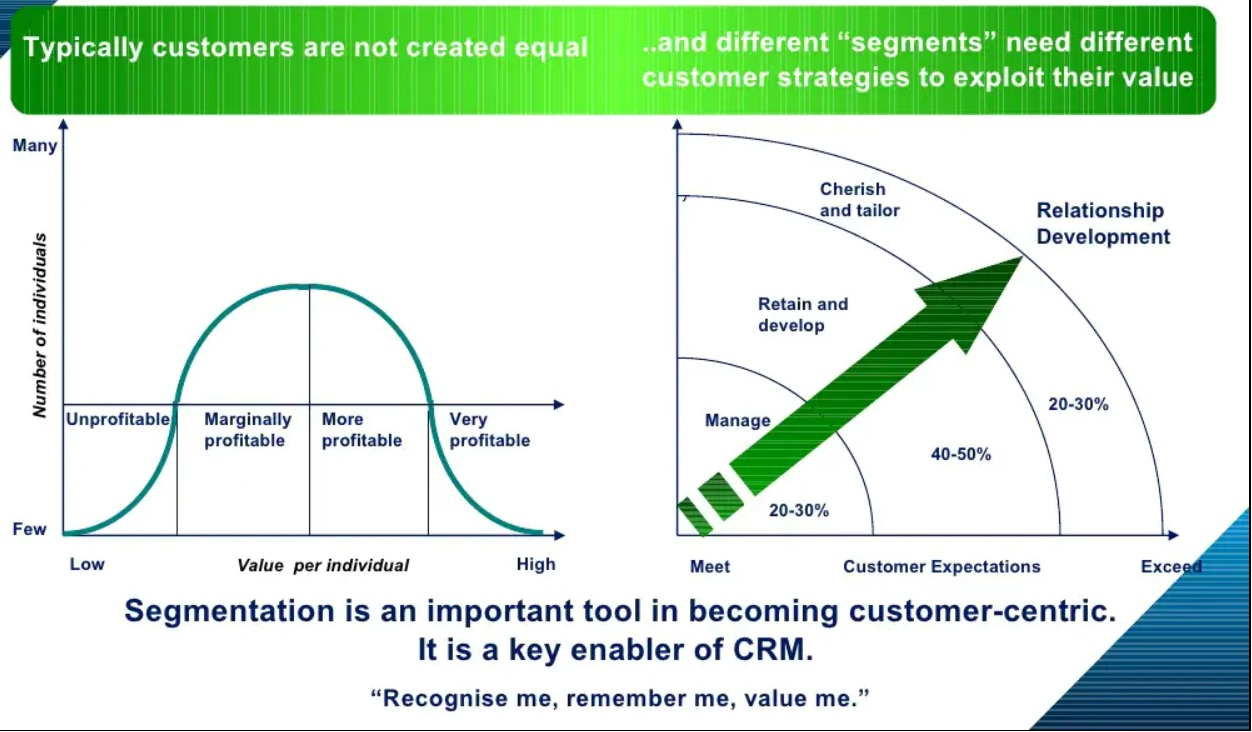

In [162]:
from IPython.display import Image
Image(filename='Untitled.jpg')

In [ ]:
#Importing LIbraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import pandas as pd 
import numpy as np 


In [ ]:
#importing dataset

In [3]:
df=pd.read_csv("Mall_Customers.csv")

# <center>Exploring Data 

In [4]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [9]:
df.shape

(200, 5)

In [10]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# <center> Finding and Treating null values in dataset

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# <center> Finding group of Age ,Income Value 

In [35]:
df.Age.value_counts()

32    11
35     9
31     8
19     8
30     7
49     7
40     6
38     6
36     6
47     6
23     6
27     6
20     5
48     5
21     5
34     5
50     5
29     5
28     4
24     4
54     4
67     4
59     4
18     4
68     3
60     3
46     3
43     3
45     3
22     3
25     3
39     3
37     3
33     3
58     2
66     2
65     2
63     2
26     2
57     2
44     2
53     2
52     2
51     2
41     2
42     2
70     2
56     1
55     1
64     1
69     1
Name: Age, dtype: int64

In [36]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

# <center> Choosing Age and Income for segmentation

In [38]:
X=df.iloc[:,2:4]

In [39]:
X.head(2)

,Age,Annual Income (k$)
0,19,15
1,21,15


# <center> Visualization  of data points on 2d plot

Text(0, 0.5, 'Annual Income bin of Customers')

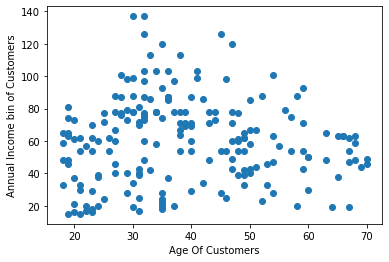

In [114]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.xlabel("Age Of Customers")
plt.ylabel("Annual Income bin of Customers")

In [115]:
# Chossing three clusters ,passing to Kmeans algorithms

In [116]:
km=KMeans(n_clusters=3)

In [117]:
df['Cluster_formed']=km.fit_predict(X)

In [118]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_formed,scaled,New Class
0,1,Male,19,15,39,2,2,3
1,2,Male,21,15,81,2,2,3


In [119]:
df['Cluster_formed'].value_counts()

1    92
0    58
2    50
Name: Cluster_formed, dtype: int64

# Im creating three diffrent datafram ! why!!!!!
## To visulized three diffrent cluster,with diffrent color combination

In [120]:
df2=df[df['Cluster_formed']==0]
df3=df[df['Cluster_formed']==1]
df4=df[df['Cluster_formed']==2]


In [121]:
df2.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_formed,scaled,New Class
8,9,Male,64,19,3,0,0,2
10,11,Male,67,19,14,0,0,2


No handles with labels found to put in legend.


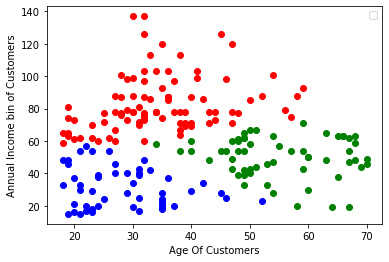

In [122]:
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='green')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='red')
plt.scatter(df4.Age,df4['Annual Income (k$)'],color='blue')
plt.xlabel("Age Of Customers")
plt.ylabel("Annual Income bin of Customers")
plt.legend()#for color legends value

# conclusion: From above you can see Red color is properly segment but blue and green a mix at some points.

## lets find why!!!!!!

In [123]:
df['Age'].max()


70

In [124]:
df['Age'].min()

18

In [125]:
df['Annual Income (k$)'].max()


137

In [126]:
df['Annual Income (k$)'].min()


15

In [127]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [128]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

# <center> Findings

#### Scaling required ,as max of age ,max of Annual income as lot of diffrence

#### We ca apply minmaxscaler

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scale=MinMaxScaler()

In [131]:
scale=scale.fit_transform(X)

In [132]:
scale

array([[0.01923077, 0.        ],
       [0.05769231, 0.        ],
       [0.03846154, 0.00819672],
       [0.09615385, 0.00819672],
       [0.25      , 0.01639344],
       [0.07692308, 0.01639344],
       [0.32692308, 0.02459016],
       [0.09615385, 0.02459016],
       [0.88461538, 0.03278689],
       [0.23076923, 0.03278689],
       [0.94230769, 0.03278689],
       [0.32692308, 0.03278689],
       [0.76923077, 0.04098361],
       [0.11538462, 0.04098361],
       [0.36538462, 0.04098361],
       [0.07692308, 0.04098361],
       [0.32692308, 0.04918033],
       [0.03846154, 0.04918033],
       [0.65384615, 0.06557377],
       [0.32692308, 0.06557377],
       [0.32692308, 0.07377049],
       [0.13461538, 0.07377049],
       [0.53846154, 0.08196721],
       [0.25      , 0.08196721],
       [0.69230769, 0.10655738],
       [0.21153846, 0.10655738],
       [0.51923077, 0.10655738],
       [0.32692308, 0.10655738],
       [0.42307692, 0.1147541 ],
       [0.09615385, 0.1147541 ],
       [0.

# Re train model with new scale data

In [133]:
df['scaled']=km.fit_predict(scale)

In [134]:
km.cluster_centers_

array([[0.33653846, 0.58435792],
       [0.72175481, 0.29943648],
       [0.15264423, 0.21016906]])

In [135]:
scaled

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [136]:
df2=df[df['scaled']==0]
df3=df[df['scaled']==1]
df4=df[df['scaled']==2]

No handles with labels found to put in legend.


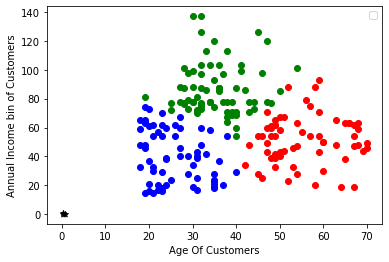

In [137]:
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='green')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='red')
plt.scatter(df4.Age,df4['Annual Income (k$)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color='black')
plt.xlabel("Age Of Customers")
plt.ylabel("Annual Income bin of Customers")
plt.legend()#for color legends value

In [138]:
# Here ,we had only two feature we can easily plot them on 2d plot,
# but in real project alot features will be there ,projected them in 2d plot
# wil not possible so we use elbow plot in 

## In case of more data points we can use elbow plot to find number of cluster


In [139]:
sse=[] #blank list

kkk=range(1,10)

for k in kkk:
    kmm=KMeans(n_clusters=k)

    kk=kmm.fit(X)
    #Sum of suquare error ,we can have in intertia
    sse.append(kk.inertia_ )

C:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [140]:
sse

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31659.353138717805,
 25399.022004416987,
 21873.21105794789,
 18894.148633449884,
 16228.193883693773]

Text(0, 0.5, 'Sum of square error')

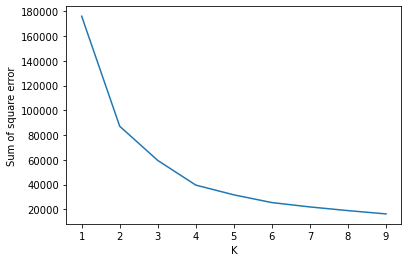

In [141]:
plt.plot(kkk,sse)
plt.xlabel("K")
plt.ylabel("Sum of square error")

In [144]:
# Finding cluster size should be 4 
# we will retune model with cluster size 

In [145]:
KM=KMeans(n_clusters=4)

In [146]:
df['New Class']=KM.fit_predict(X)

In [147]:
KM.cluster_centers_

array([[ 55.81481481,  51.77777778],
       [ 30.34693878,  29.26530612],
       [ 39.        , 106.5       ],
       [ 31.95890411,  72.95890411]])

In [148]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_formed,scaled,New Class
0,1,Male,19,15,39,2,2,1
1,2,Male,21,15,81,2,2,1


In [149]:
df2=df[df['New Class']==0]
df3=df[df['New Class']==1]
df4=df[df['New Class']==2]
df5=df[df['New Class']==3]


No handles with labels found to put in legend.


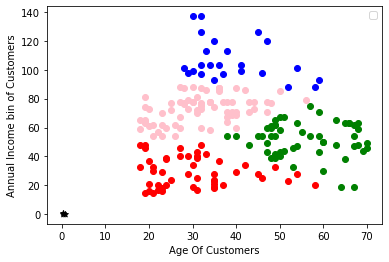

In [150]:
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='green')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='red')
plt.scatter(df4.Age,df4['Annual Income (k$)'],color='blue')
plt.scatter(df5.Age,df5['Annual Income (k$)'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color='black')
plt.xlabel("Age Of Customers")
plt.ylabel("Annual Income bin of Customers")
plt.legend()#fo

In [151]:
df2.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_formed,scaled,New Class
8,9,Male,64,19,3,0,1,0
10,11,Male,67,19,14,0,1,0
30,31,Male,60,30,4,0,1,0
32,33,Male,53,33,4,0,1,0
40,41,Female,65,38,35,0,1,0
42,43,Male,48,39,36,0,1,0
44,45,Female,49,39,28,0,1,0
46,47,Female,50,40,55,0,1,0
50,51,Female,49,42,52,0,1,0
53,54,Male,59,43,60,0,1,0


In [152]:
df2['Age'].value_counts()

49    6
48    4
67    4
50    4
47    3
60    3
68    3
59    3
57    2
54    2
53    2
51    2
63    2
65    2
70    2
66    2
46    1
45    1
43    1
40    1
38    1
55    1
69    1
64    1
Name: Age, dtype: int64

(array([ 0.,  0.,  1.,  2., 19.]),
 array([25, 30, 35, 40, 45, 50]),
 <BarContainer object of 5 artists>)

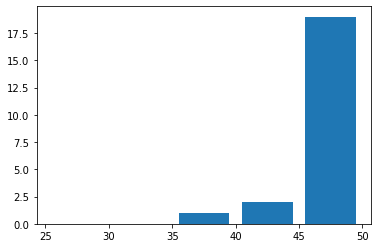

In [153]:
plt.hist(df2['Age'],bins=[25,30,35,40,45,50],rwidth=.8)

Text(0.5, 0, 'Annual Income ')

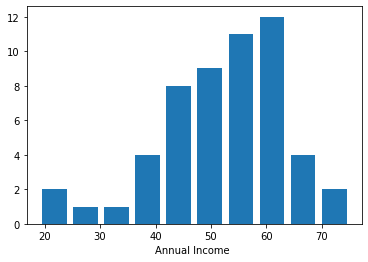

In [156]:
plt.hist(df2['Annual Income (k$)'],rwidth=.8)  
plt.xlabel("Annual Income ")

Text(0.5, 0, 'Annual Income ')

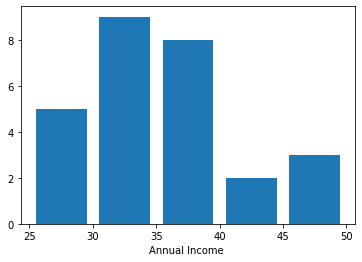

In [157]:
plt.hist(df3['Age'],bins=[25,30,35,40,45,50],rwidth=.8)
plt.xlabel("Annual Income ")

Text(0.5, 0, 'Annual Income ')

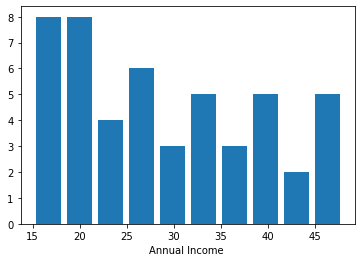

In [158]:
plt.hist(df3['Annual Income (k$)'],rwidth=.8)
plt.xlabel("Annual Income ")

In [ ]:
# Finding is above group df3  is least income group , company can offer them discount on current trends on less expensive things

Text(0.5, 0, 'Annual Income ')

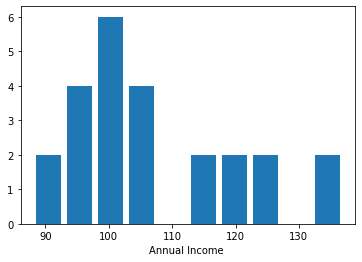

In [159]:
plt.hist(df4['Annual Income (k$)'],rwidth=.8)
plt.xlabel("Annual Income ")

Text(0.5, 0, 'Age')

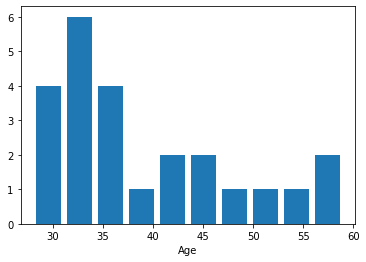

In [161]:
plt.hist(df4['Age'],rwidth=.8)
plt.xlabel("Age")

In [113]:
# Finding ---> This clusterDF4 having more income ,there paying capcity is more ,company can offer more discounts on luxery 
# and tredy thing as most people are youngster

(array([ 4.,  6.,  7.,  4.,  4., 13.,  7., 16.,  0., 12.]),
 array([54. , 57.4, 60.8, 64.2, 67.6, 71. , 74.4, 77.8, 81.2, 84.6, 88. ]),
 <BarContainer object of 10 artists>)

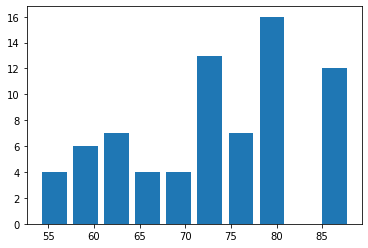

In [160]:
plt.hist(df5['Annual Income (k$)'],rwidth=.8)

In [163]:
KM.predict(25,100)

ValueError: Expected 2D array, got scalar array instead:
array=25.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.